In [1]:
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
import geopandas as gpd
from shapely.geometry import Point
import shapely
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#data = pd.read_excel('/Users/VarshiniSelvadurai/Documents/Internship/Crime_Edited.xlsx', sheet_name = 'May')
data = pd.read_excel('C:\\Users\\vns8\\Documents\\Crime_Edited.xlsx', sheet_name = 'May')
data = data.loc[data["Crime Name1"] != "Not a Crime"]
data = data.drop(columns = ["Police District Number","Address Number","Victims","CR Number","NIBRS Code","Beat","PRA","State","Incident ID","Offence Code","Sector"])
ugh = list(map(str, data["Start Time"]))
for i in range (0, len(ugh)):
    ugh[i] = ugh[i][:2]
data["Start Time"] = ugh
ugh = (list(map(str,data['Start Date'])))
ughh = []
for i in range(0,len(ugh)):
    ugh[i] = ugh[i][5:]
    ugh[i] = ugh[i][:5]
data['Start Date'] = ugh

In [3]:
zip20910 = data.loc[data["Zip Code"] == 20910.0]
zip20902 = data.loc[data["Zip Code"] == 20902.0]
zip20874 = data.loc[data["Zip Code"] == 20874.0]
zip20904 = data.loc[data["Zip Code"] == 20904.0]
zip20906 = data.loc[data["Zip Code"] == 20906.0]

In [4]:
def DUDE(array_key,array_value ):
    ugh = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
    for i in range(0,len(array_key)-1):
        ugh[int(array_key[i])] = array_value[i]
    return ugh

In [8]:
hourvalues = list(map(str, zip20910['Start Time'].value_counts().keys().tolist()))
hourcounts = DUDE(hourvalues, list(map(int, zip20910['Start Time'].value_counts().tolist())))
hourvalues2 = list(map(str, zip20902['Start Time'].value_counts().keys().tolist()))
hourcounts2 = DUDE(hourvalues2, list(map(int, zip20902['Start Time'].value_counts().tolist())))
hourvalues3 = list(map(str, zip20874['Start Time'].value_counts().keys().tolist()))
hourcounts3 = DUDE(hourvalues3, list(map(int, zip20874['Start Time'].value_counts().tolist())))
hourvalues4 = list(map(str, zip20904['Start Time'].value_counts().keys().tolist()))
hourcounts4 = DUDE(hourvalues4, list(map(int, zip20904['Start Time'].value_counts().tolist())))
hourvalues5 = list(map(str, zip20906['Start Time'].value_counts().keys().tolist()))
hourcounts5 = DUDE(hourvalues5, list(map(int, zip20906['Start Time'].value_counts().tolist())))
print(hourvalues)
print(hourcounts)
hourvalues.sort()
hourvalues2.sort()
hourvalues3.sort()
hourvalues4.sort()
hourvalues5.sort()
print(hourvalues)
print(hourcounts)
print(hourvalues2)
print(hourvalues3)
print(hourvalues4)
print(hourvalues5)

['21', '23', '22', '16', '17', '19', '13', '20', '11', '15', '18', '14', '09', '00', '07', '03', '10', '12', '04', '01', '08', '02', '05', '06']
[7, 3, 2, 4, 3, 1, 0, 5, 3, 8, 4, 9, 4, 11, 8, 9, 13, 12, 8, 12, 11, 19, 14, 16]
['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23']
[7, 3, 2, 4, 3, 1, 0, 5, 3, 8, 4, 9, 4, 11, 8, 9, 13, 12, 8, 12, 11, 19, 14, 16]
['00', '01', '02', '03', '04', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23']
['00', '01', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23']
['00', '01', '02', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23']
['00', '01', '02', '03', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22'

# Number of crimes by hour of day for each zipcode

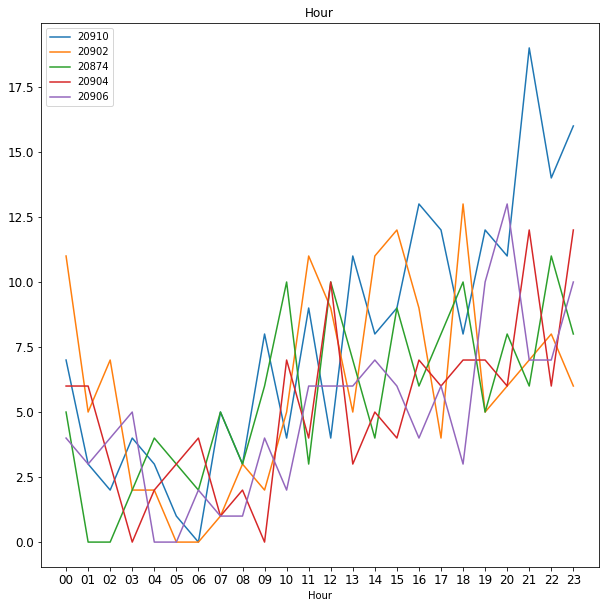

In [22]:
hour = pd.DataFrame({'Hour':hourvalues,'20910':hourcounts,'20902':hourcounts2,'20874':hourcounts3,'20904':hourcounts4,'20906':hourcounts5})
#hourbar = hour.sort_values(['Hour'])
#hourbar = hour.drop([24],axis = 0)
ax = hour.plot(x = 'Hour', kind = 'line', figsize = (10,10),title = 'Hour', fontsize = 12, xticks = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])


In [10]:
def weekandcount(data,w,title):
    bruh = [[0,0,0,0,0,0,0],
            [0,0,0,0,0,0,0],
            [0,0,0,0,0,0,0],
            [0,0,0,0,0,0,0]]
    for index, row in data.iterrows():
        if (row['Start Day'] == "Monday"):
            i = 6
        elif (row['Start Day'] == "Tuesday"):
            i = 5
        elif (row['Start Day'] == "Wednesday"):
            i = 4
        elif (row['Start Day'] == "Thursday"):
            i = 3
        elif (row['Start Day'] == "Friday"):
            i = 2
        elif (row['Start Day'] == "Saturday"):
            i = 1
        elif (row['Start Day'] == "Sunday"):
            i = 0
        if (row['Crime Name1']) == "Crime Against Society":
            bruh[1][i] +=1
        elif (row['Crime Name1']) == "Crime Against Person":
            bruh[2][i] +=1
        elif(row['Crime Name1']) == "Other":
            bruh[3][i] +=1
        elif(row['Crime Name1']) == "Crime Against Property":
            bruh[0][i] +=1
    dayvalues = list(map(str, data['Start Day'].value_counts().keys().tolist()))
    daycounts = list(map(int, data['Start Day'].value_counts().tolist()))
    daysofweek = pd.DataFrame({'day':dayvalues,'count':daycounts})
    order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
    order.reverse()
    mapping = {day: i for i, day in enumerate(order)}
    key = daysofweek['day'].map(mapping)
    daybar = daysofweek.iloc[key.argsort()]
    daybar["CAProp"] = bruh[0]
    daybar["CASoc"] = bruh[1]
    daybar["CAPer"] = bruh[2]
    daybar["Other"] = bruh[3]
    ax = daybar.plot(x = 'day', y = 'count', kind = 'barh', figsize = (20,20),title = title, legend = False)
    for i in ax.patches:
        # get_width pulls left or right; get_y pushes up or down
        ax.text(i.get_width()+w, i.get_y()+.19,str(i.get_width()))
    ugh = daybar["count"]
    daybar = daybar.drop(["count"],axis = 1)
    ax = daybar.plot.barh(figsize = (20,20),stacked = True,x = 'day')
    daybar["count"] = ugh
    #for i in ax.patches:
        # get_width pulls left or right; get_y pushes up or down
    #    ax.text(i.get_width()+15000, i.get_y()+.19,str(i.get_width()))

# Crime per Day of week

C:\Users\vns8\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\vns8\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\vns8\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

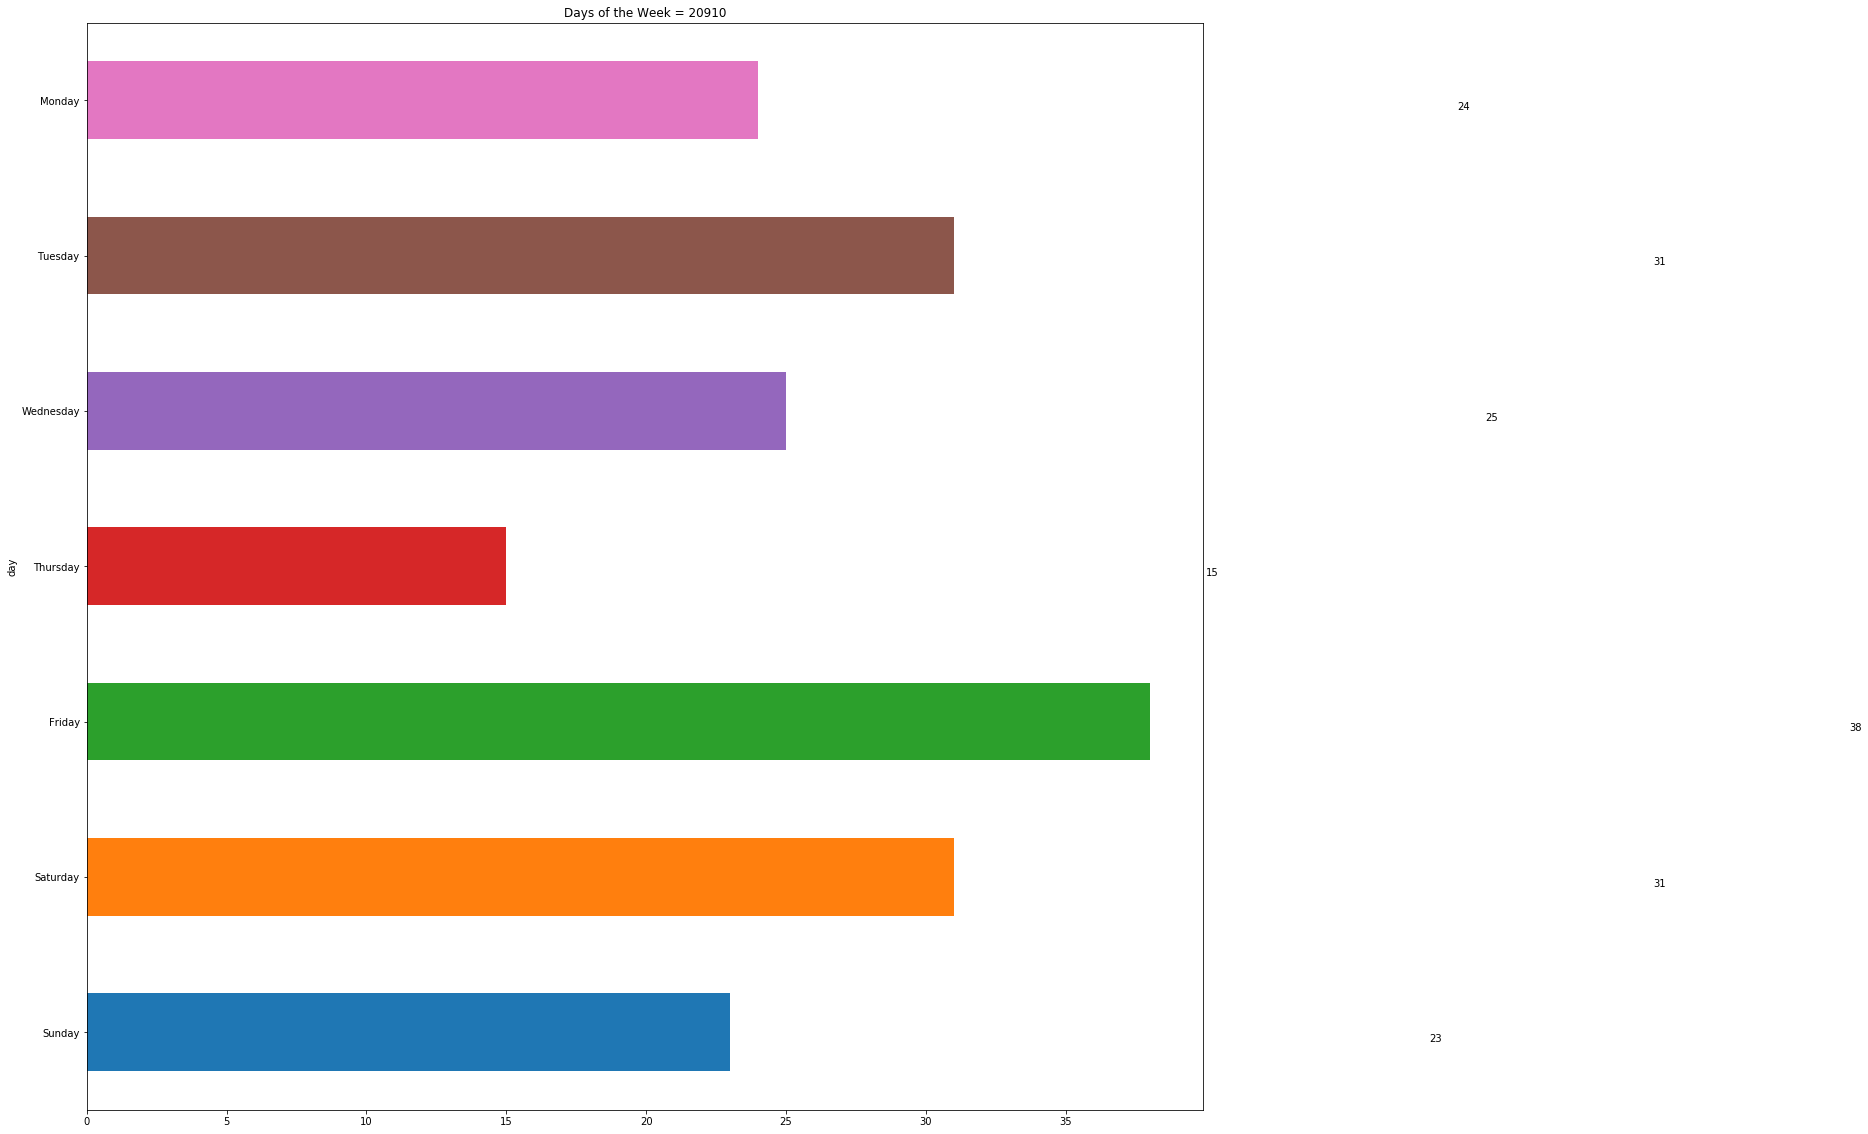

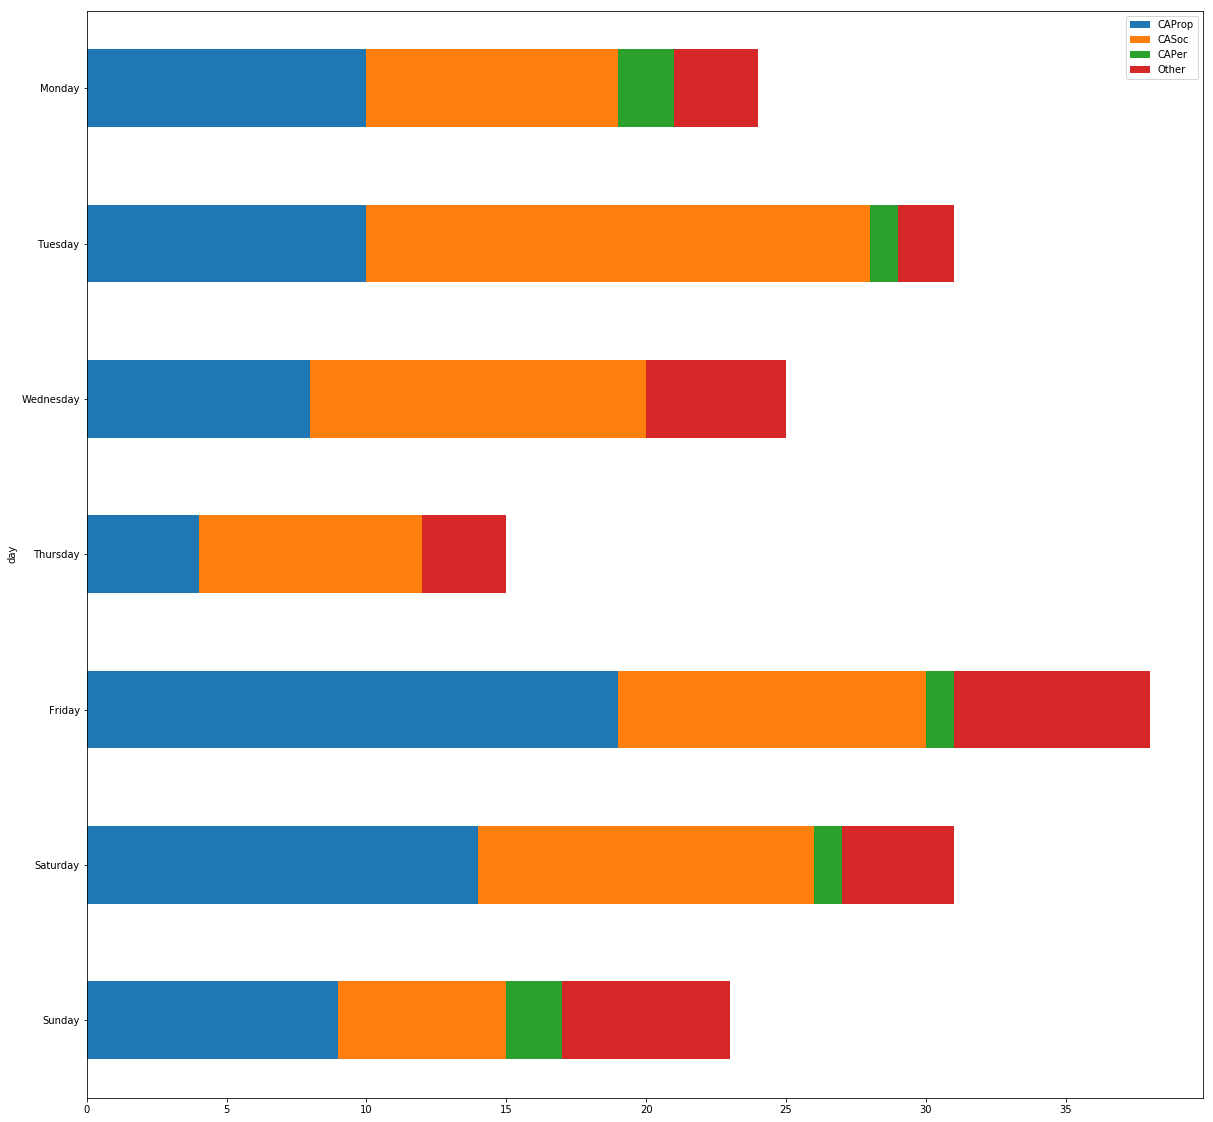

In [11]:
weekandcount(zip20910,25,"Days of the Week = 20910")

C:\Users\vns8\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\vns8\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\vns8\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

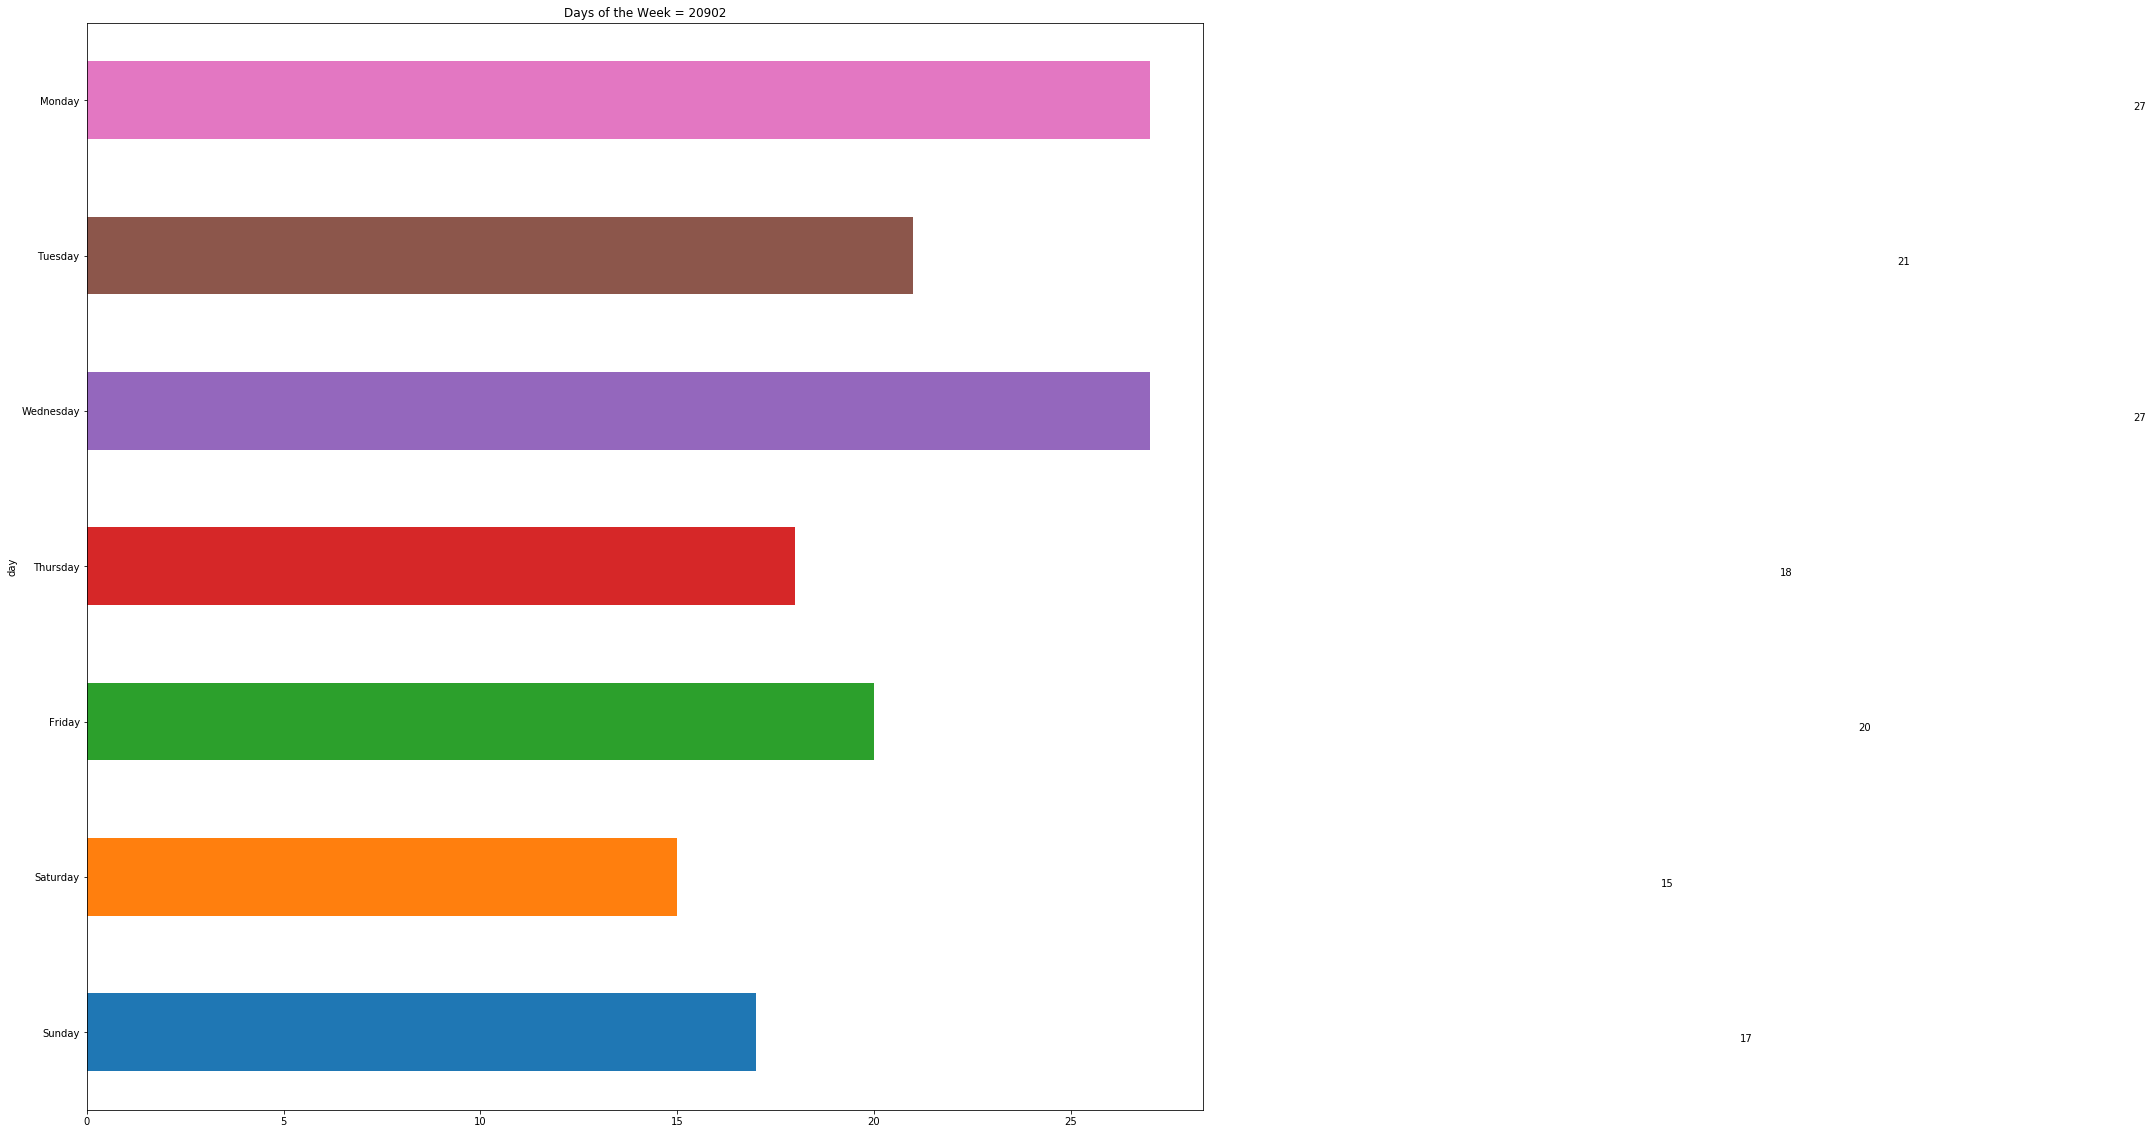

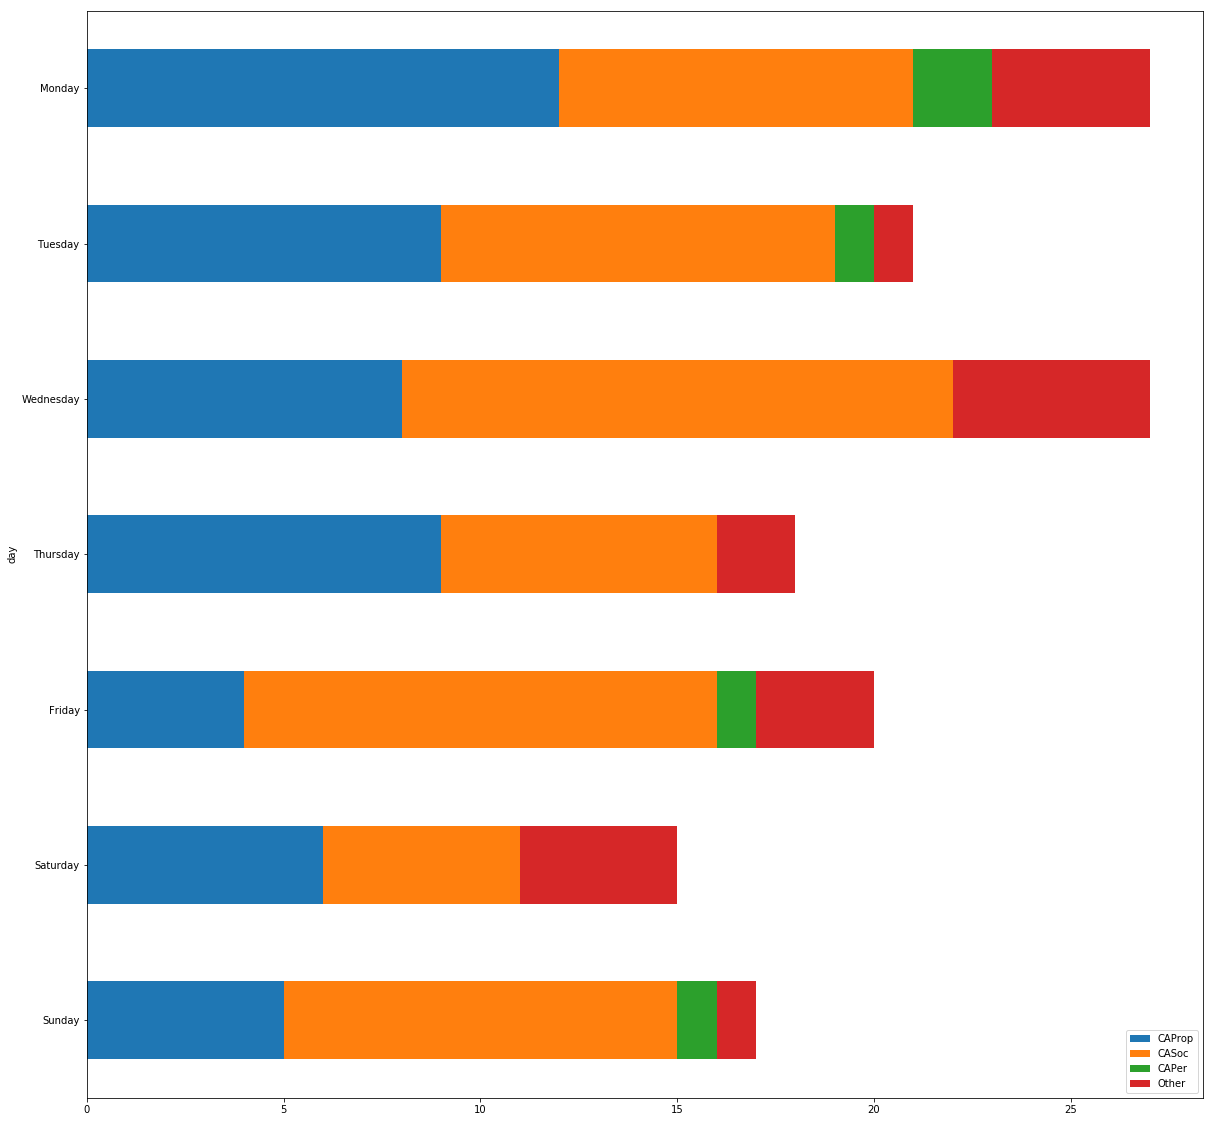

In [12]:
weekandcount(zip20902,25,"Days of the Week = 20902")

C:\Users\vns8\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\vns8\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\vns8\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

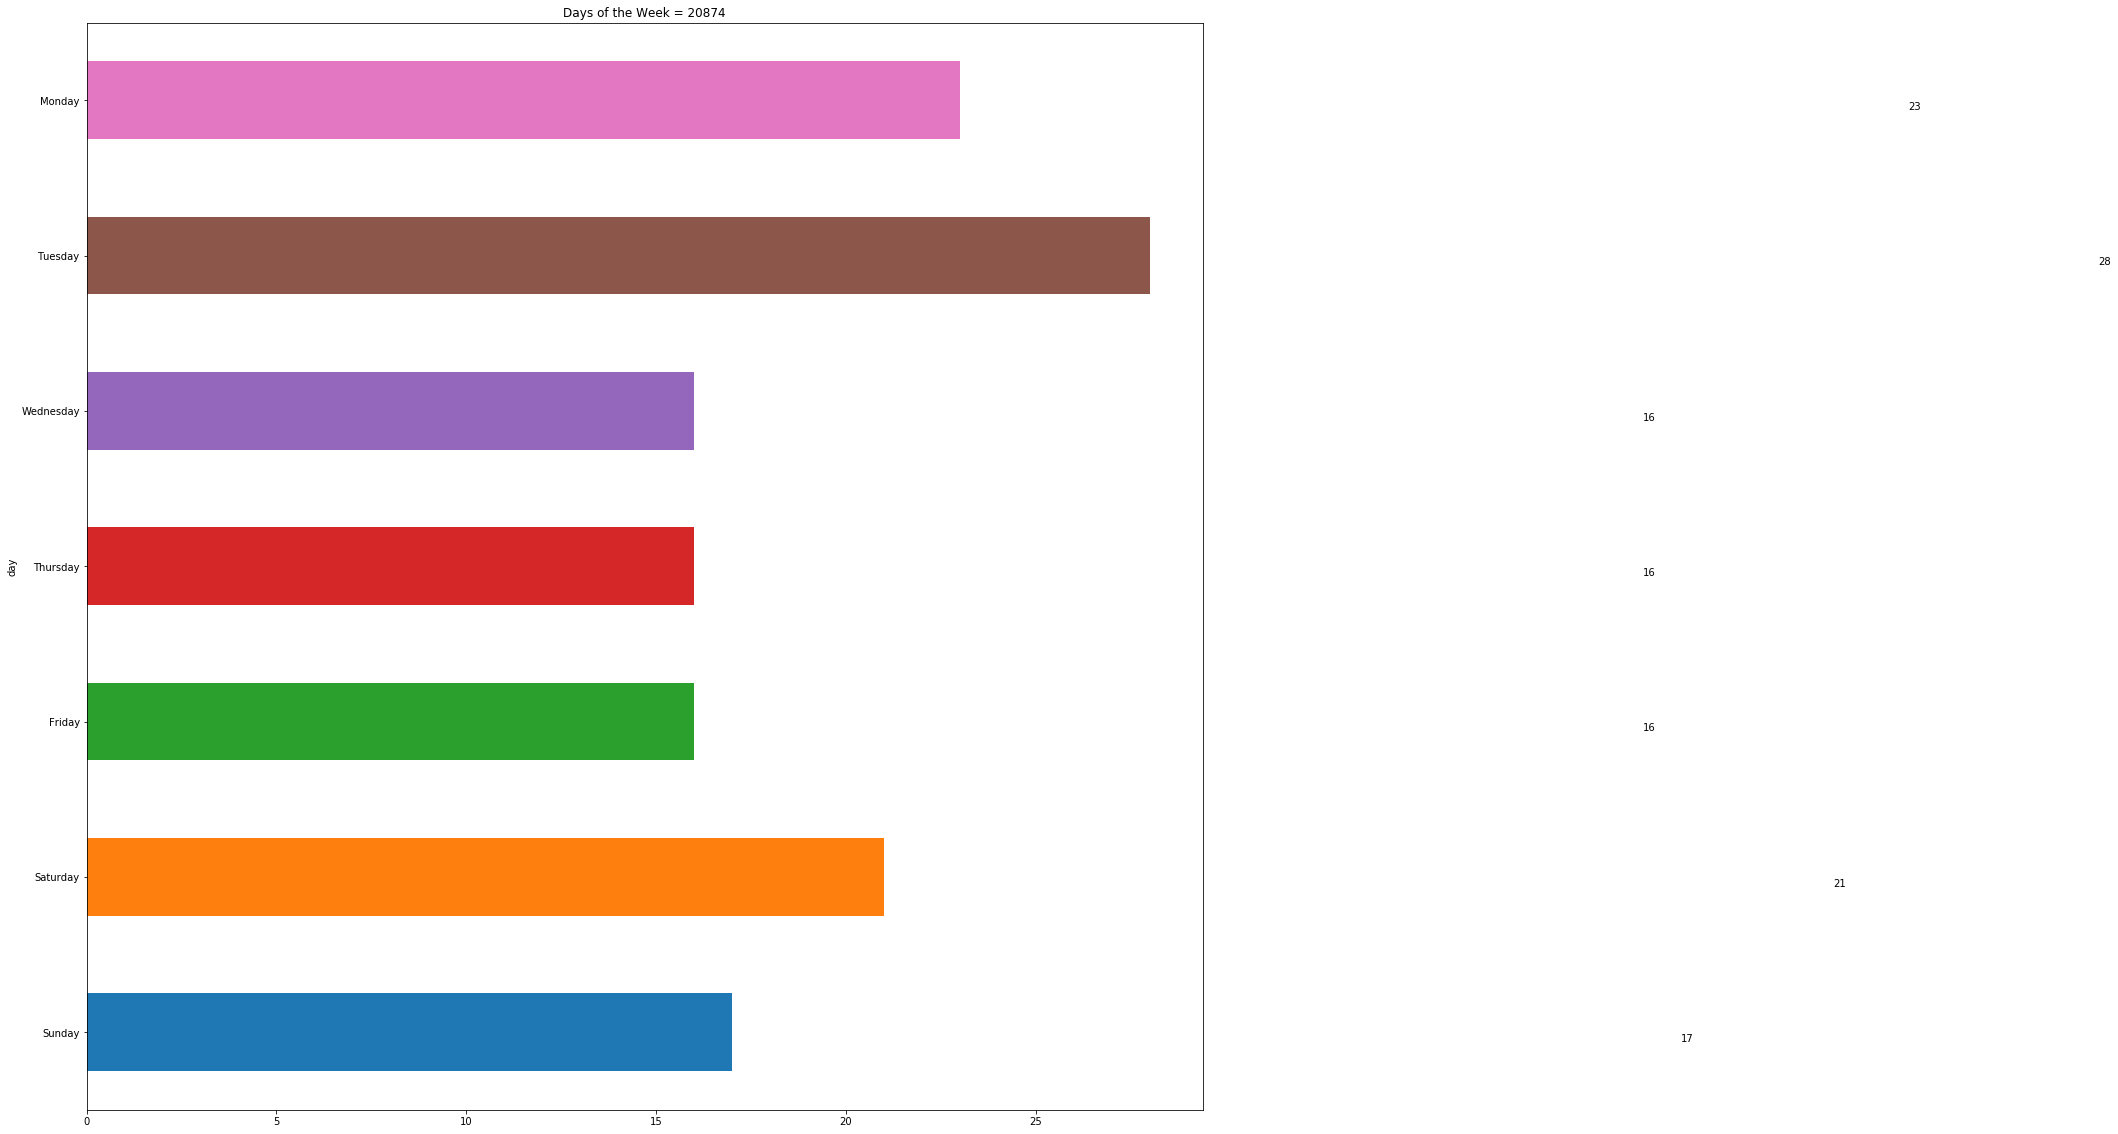

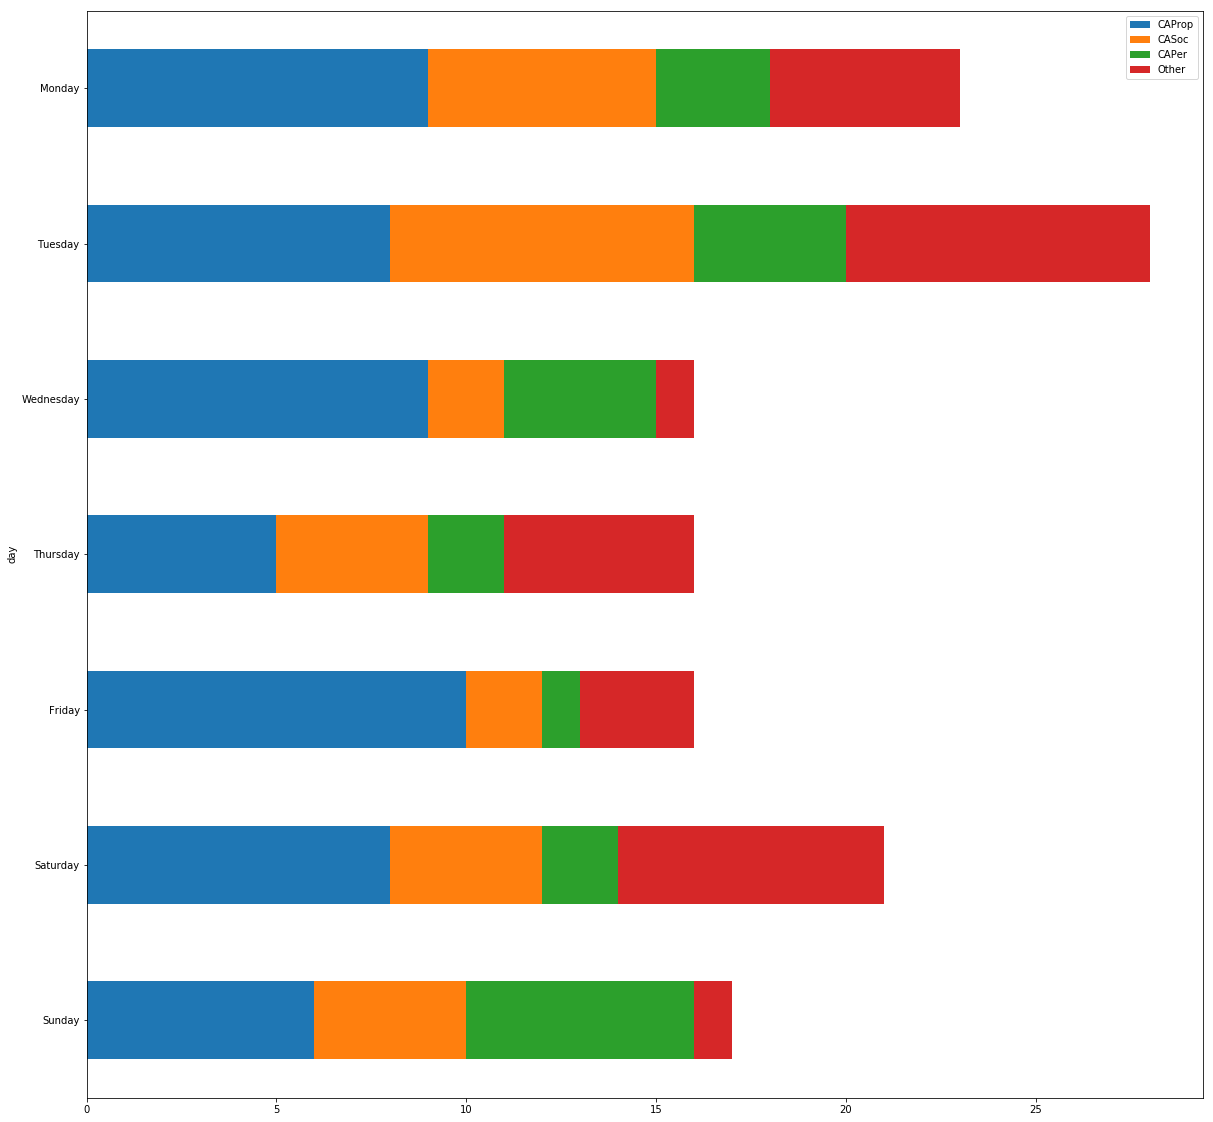

In [13]:
weekandcount(zip20874,25,"Days of the Week = 20874")

C:\Users\vns8\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\vns8\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\vns8\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

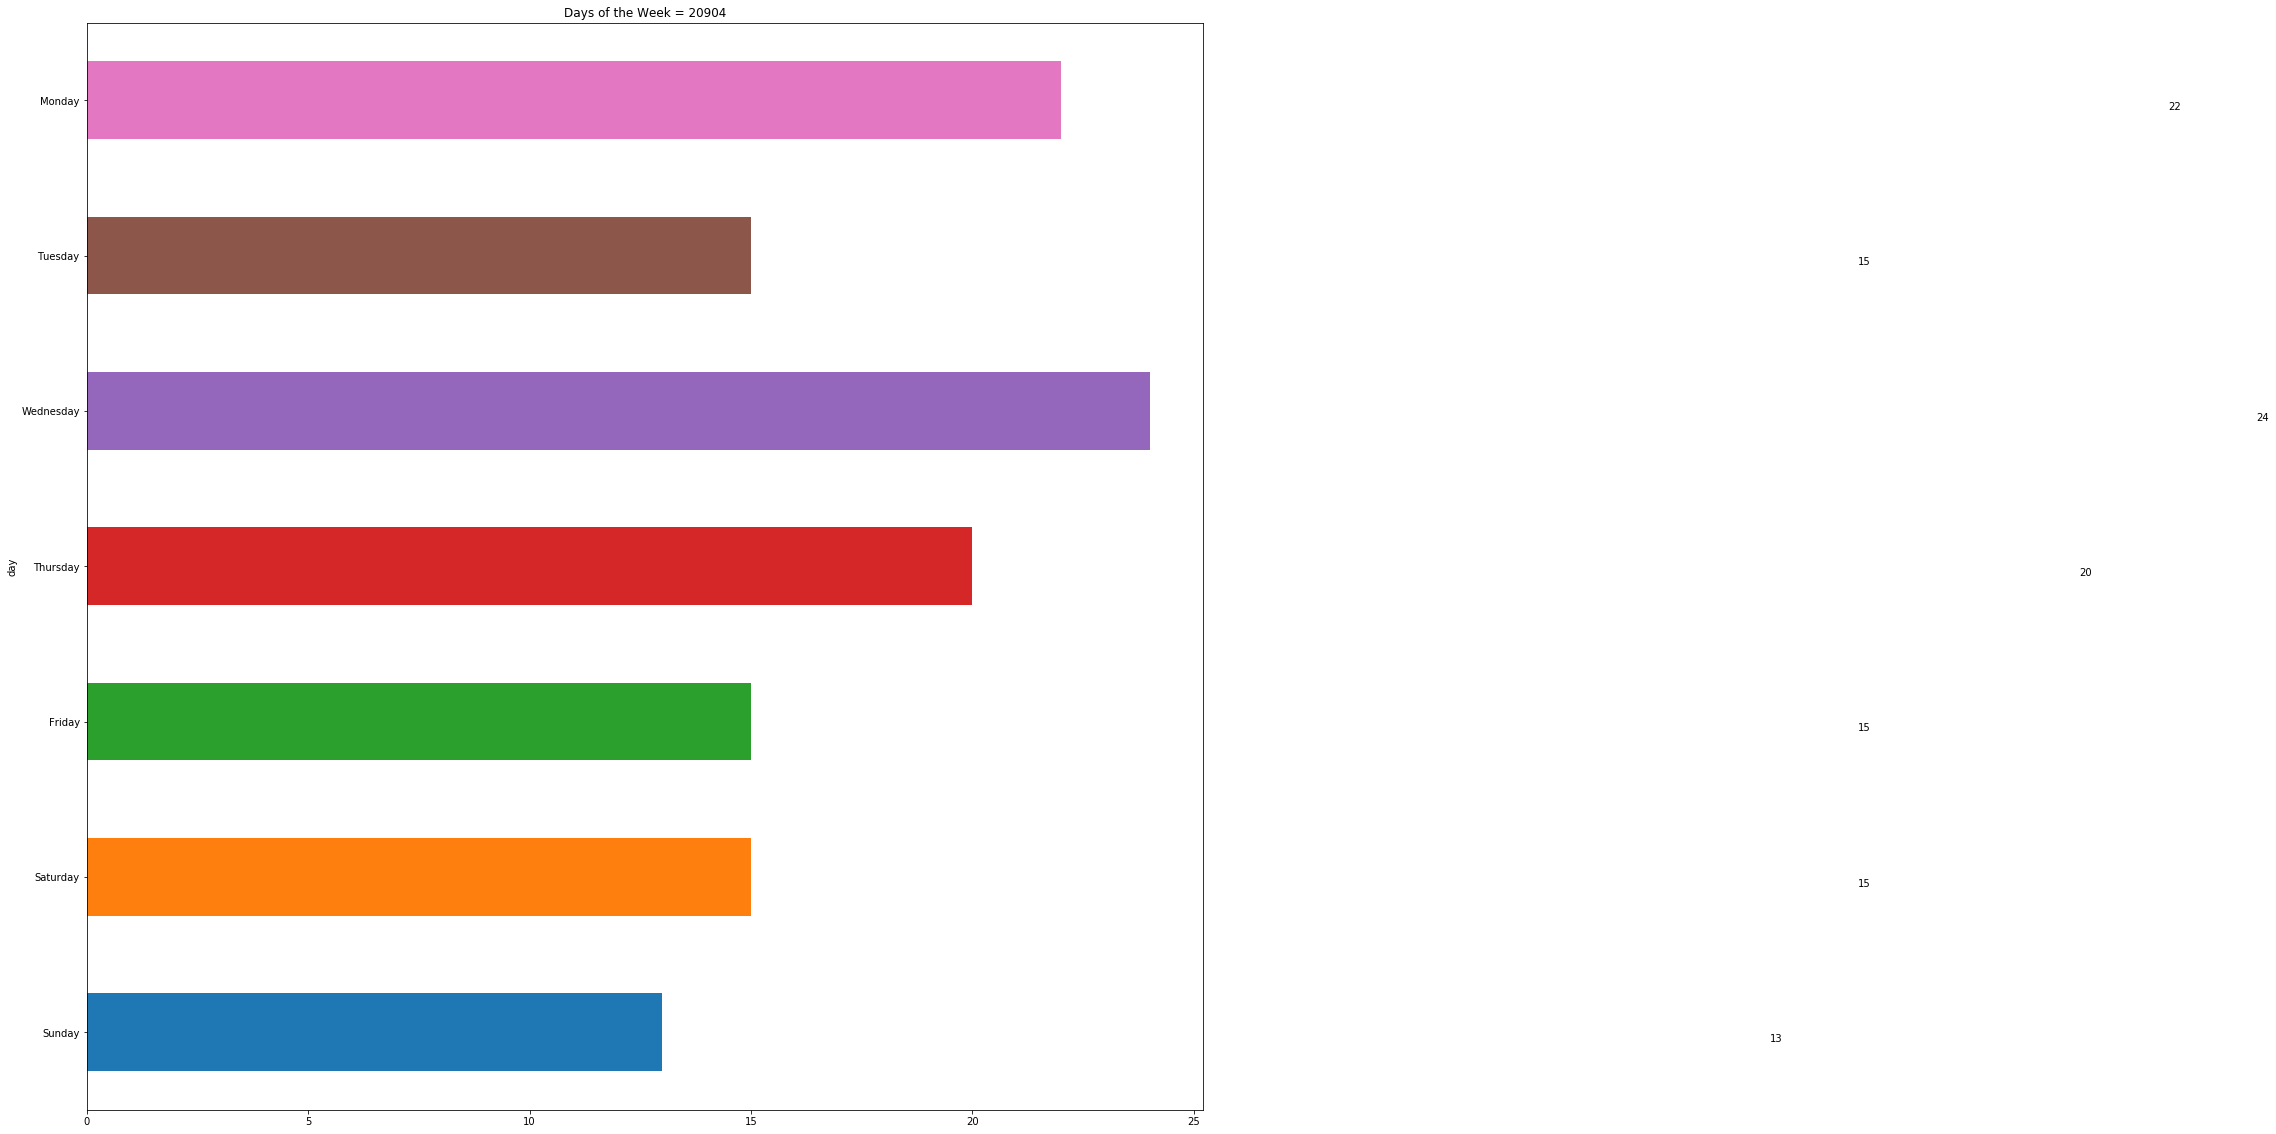

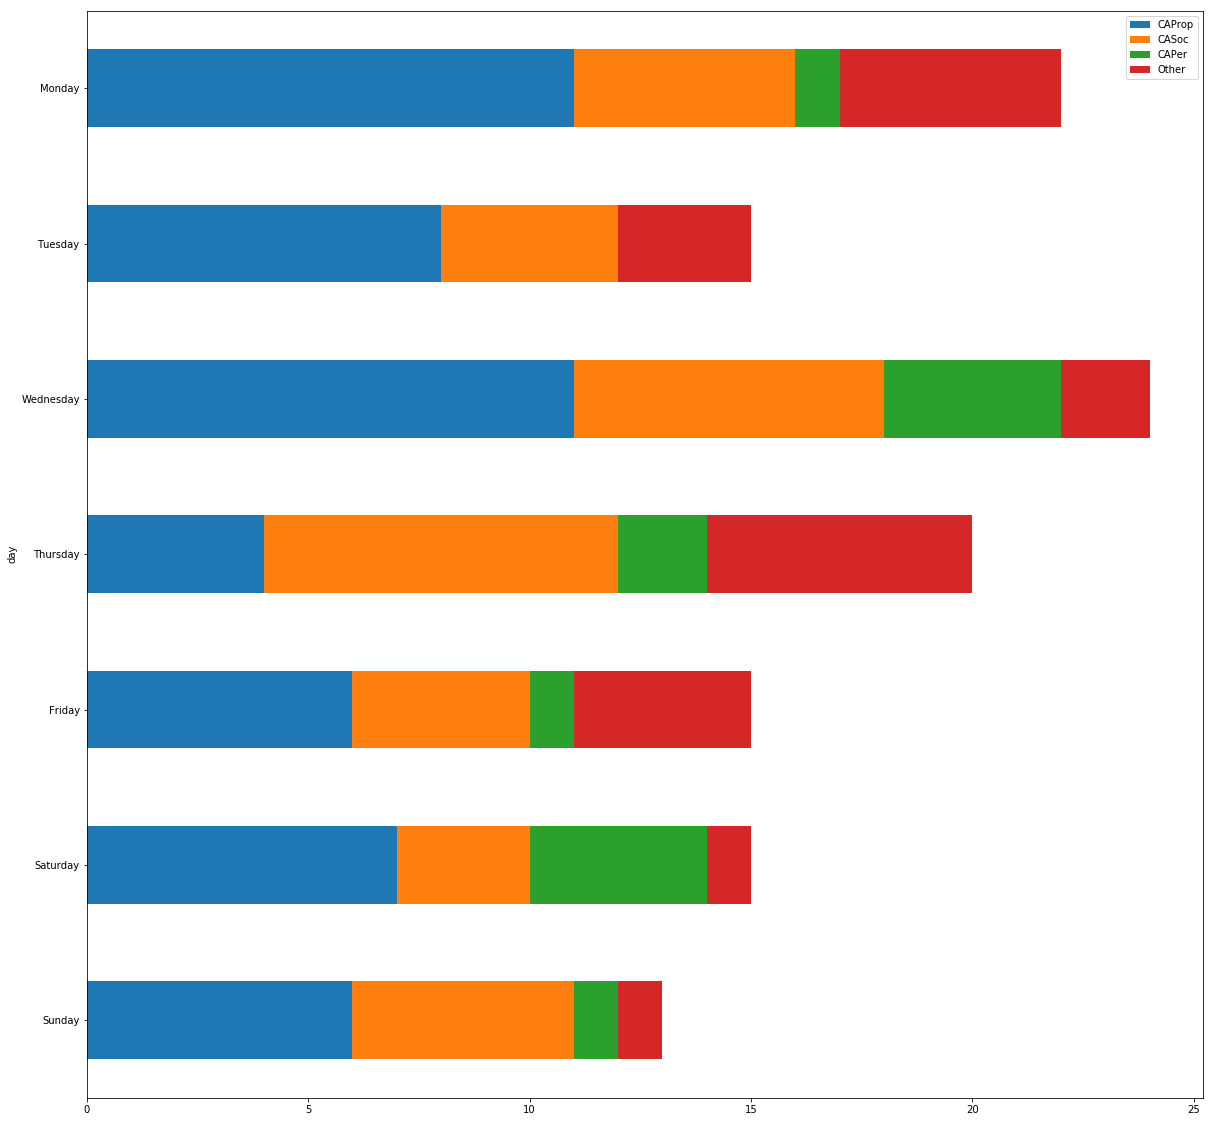

In [14]:
weekandcount(zip20904,25,"Days of the Week = 20904")

C:\Users\vns8\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\vns8\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\vns8\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

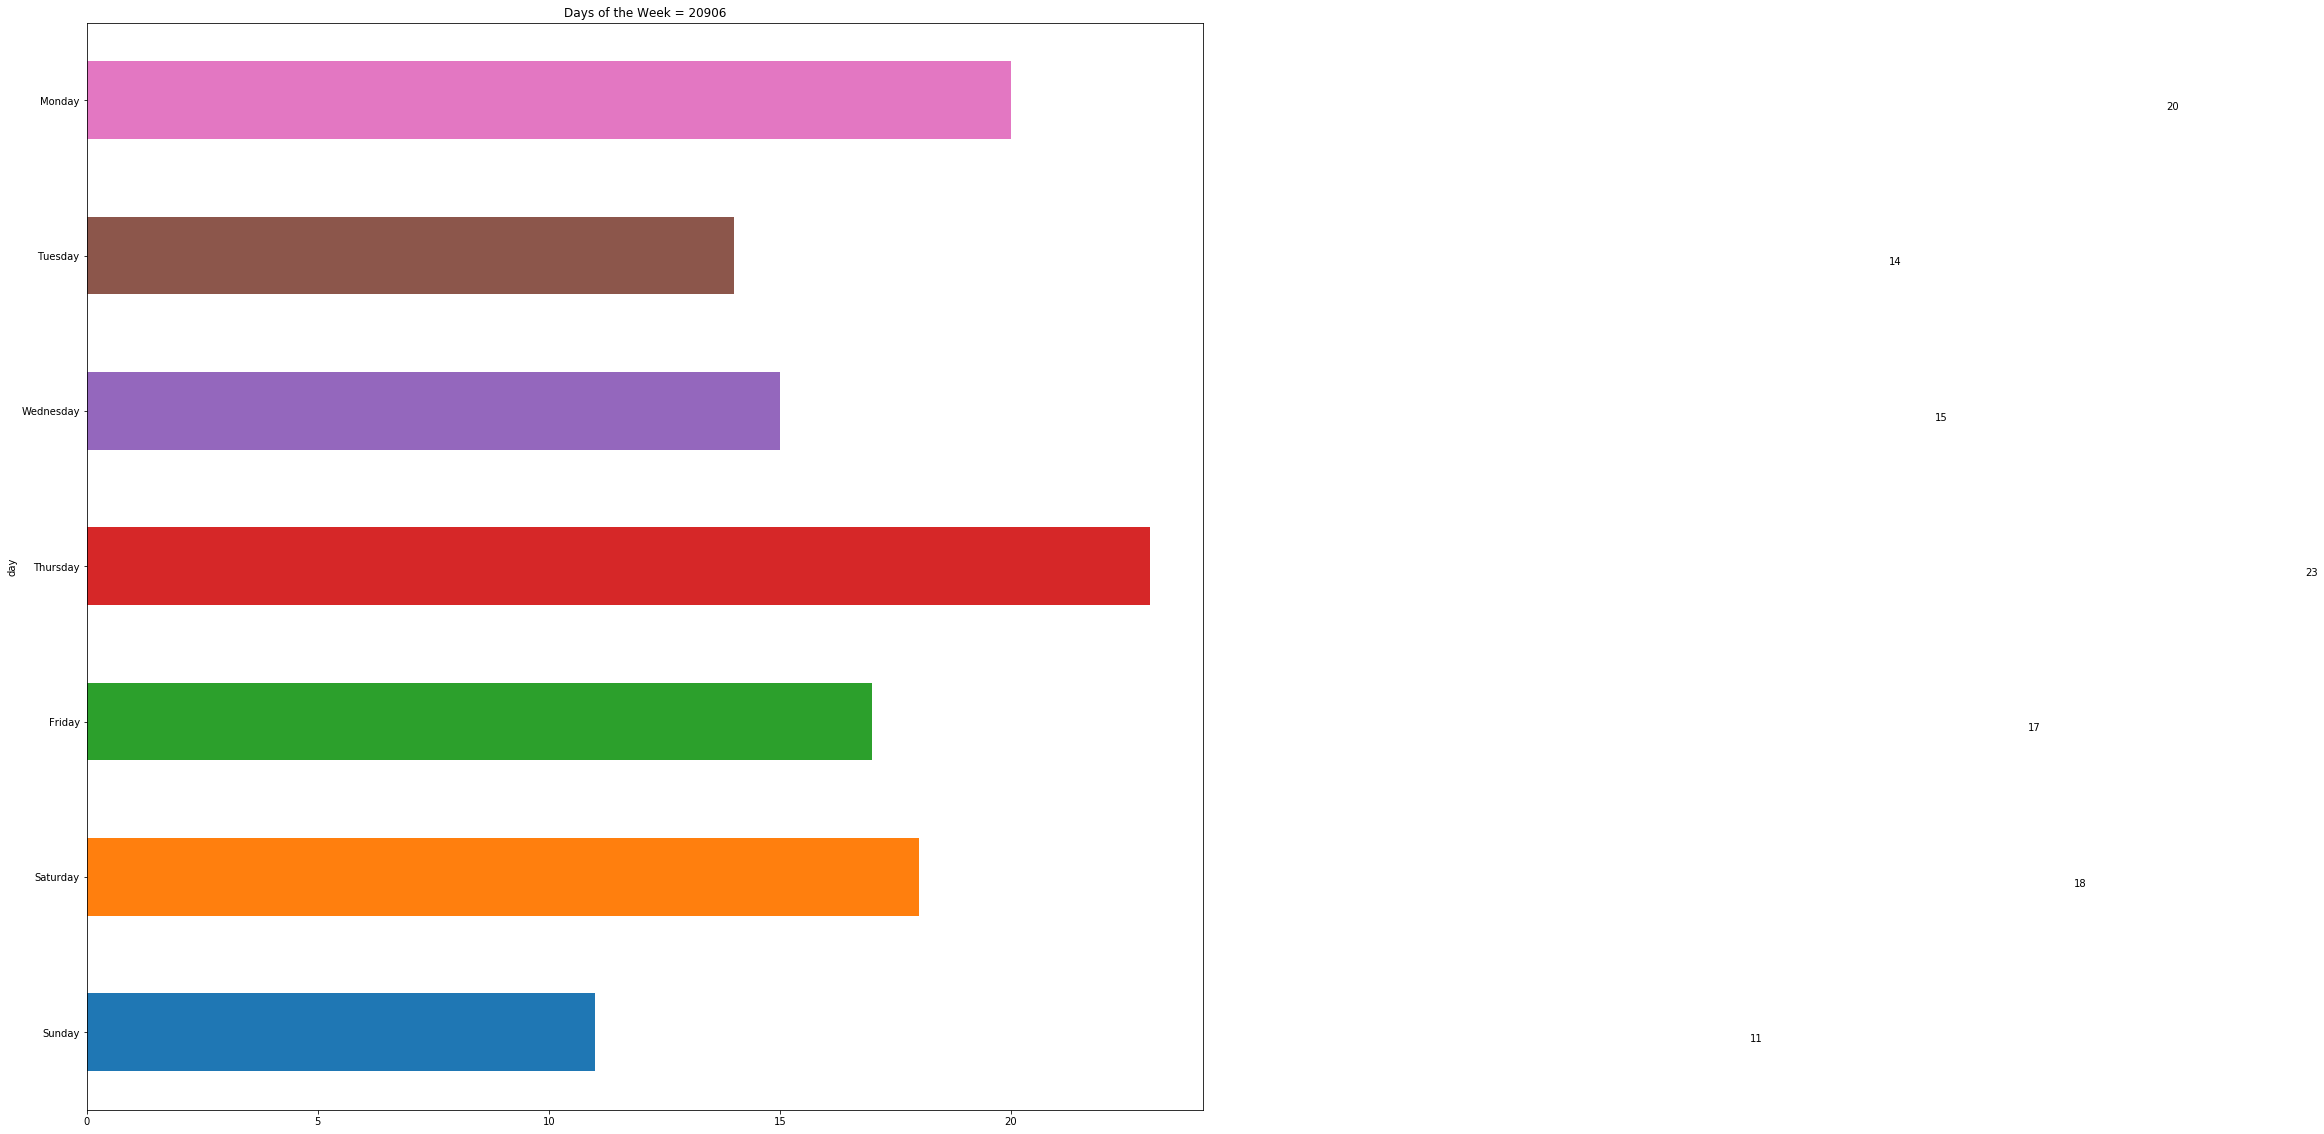

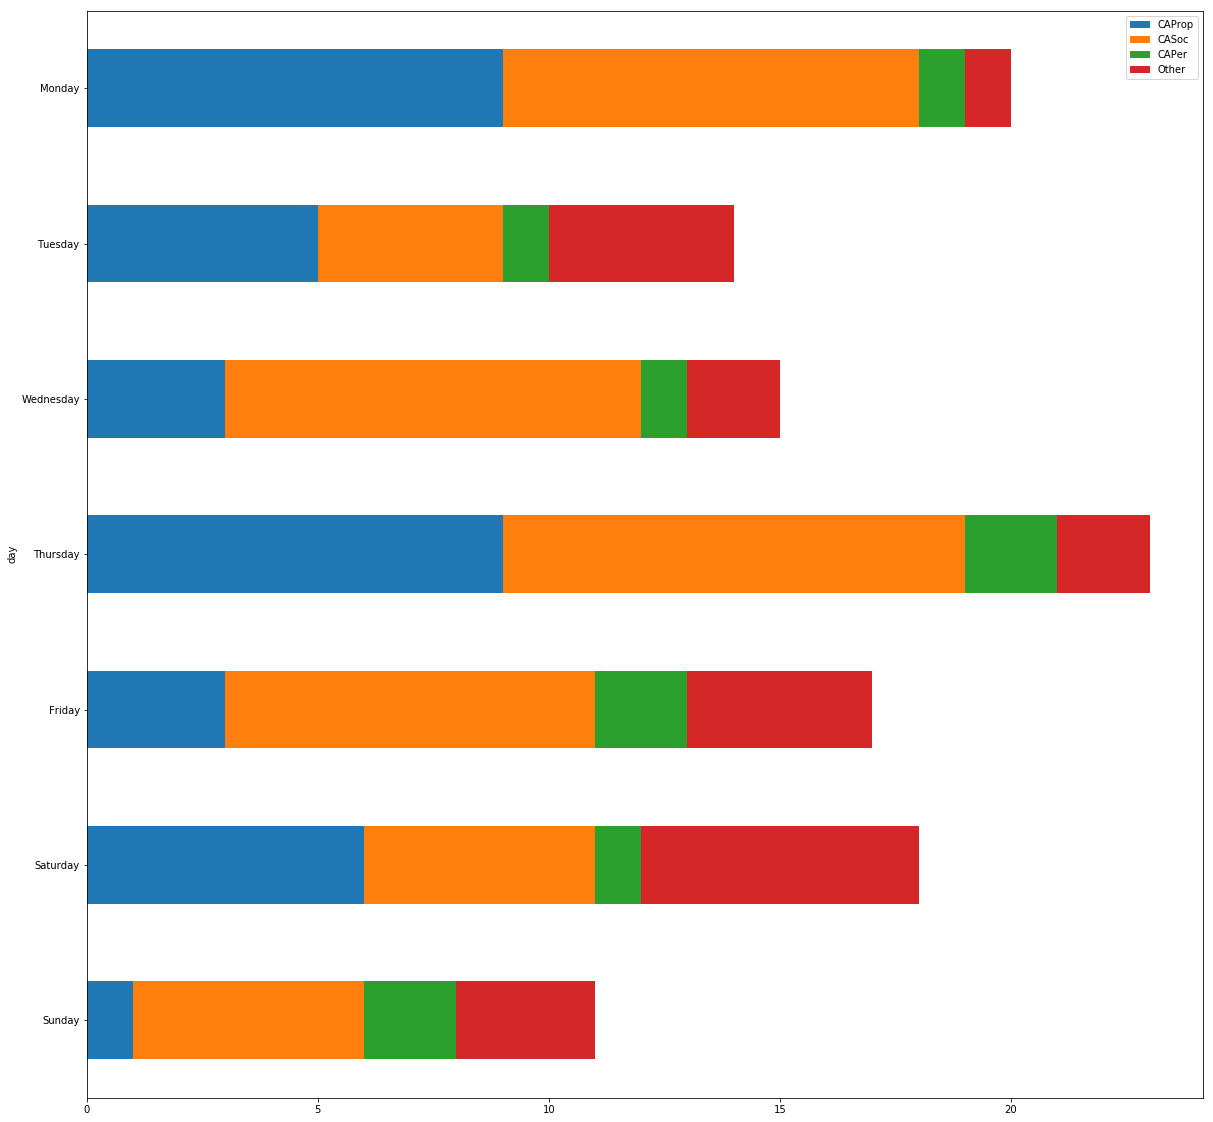

In [15]:
weekandcount(zip20906,25,"Days of the Week = 20906")

In [16]:
def dayandcount(data,w):
    datevalues = list(map(str, data['Start Date'].value_counts().keys().tolist()))
    datecounts = list(map(int, data['Start Date'].value_counts().tolist()))
    ughh = []
    ughhh = []
    date = pd.DataFrame({'Date':datevalues,'count':datecounts})
    ugh = list(map(str,date['Date']))
    for i in range(0,len(date)):
        ughh.append(ugh[i][:2])
        ughhh.append(ugh[i][3:])
    date['month'] = ughh
    date['day'] = ughhh
    date = (date).sort_values(['Date'])
    bruh = [0]*14
    bruh1 = [0]*14
    bruh2 = [0]*14
    bruh3 = [0]*14
    ugh = []
    datevalues.sort()
    for index, row in data.iterrows():  
        if (row['Crime Name1']) == "Crime Against Society":
            bruh1[datevalues.index(row['Start Date'])] +=1
            #print(row['Start Date'],datevalues.index(row['Start Date']),row["Crime Name1"])
            #print(bruh1)
        elif (row['Crime Name1']) == "Crime Against Person":
            bruh2[datevalues.index(row['Start Date'])] +=1
        elif(row['Crime Name1']) == "Other":
            bruh3[datevalues.index(row['Start Date'])] +=1
        elif(row['Crime Name1']) == "Crime Against Property":
            bruh[datevalues.index(row['Start Date'])] +=1
    date["Crime Against Property"] = bruh
    date["Crime Against Society"] = bruh1
    date["Crime Against Person"] = bruh2
    date["Other"] = bruh3
    #date = date.drop([0],axis = 0)
    date = date.iloc[::-1]
    ax = date.plot(x = 'Date', y = 'count', kind = 'barh', figsize = (5,5),title = "Date", legend = False, fontsize = 12)
    for i in ax.patches:
        # get_width pulls left or right; get_y pushes up or down
        ax.text(i.get_width()+w, i.get_y()+.19,str(i.get_width()))
    ugh = date["count"]
    date = date.drop(["count"],axis = 1)
    ax = date.plot.barh(figsize = (5,5),stacked = True,x = 'Date')
    date["count"] = ugh
    return date

# Crime by Day

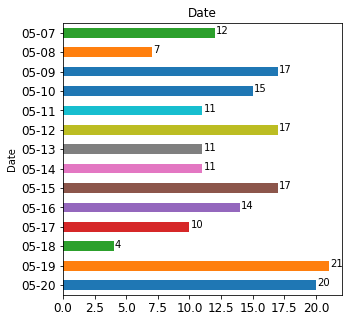

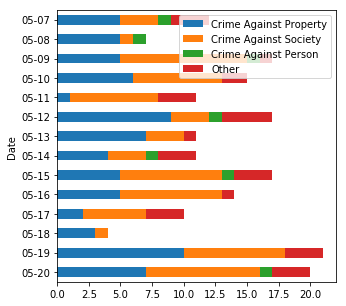

In [17]:
date1 = dayandcount(zip20910,.1)

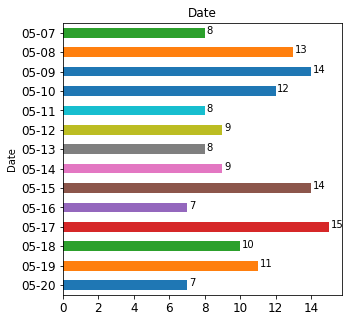

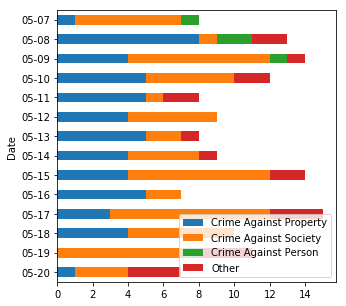

In [18]:
date2 = dayandcount(zip20902,.1)

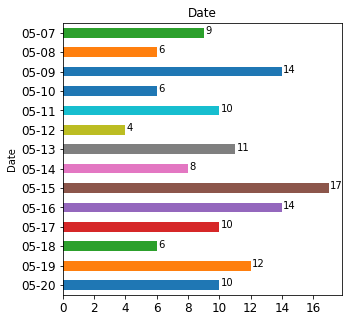

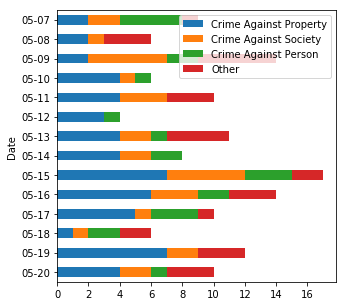

In [19]:
date3 = dayandcount(zip20874,.1)

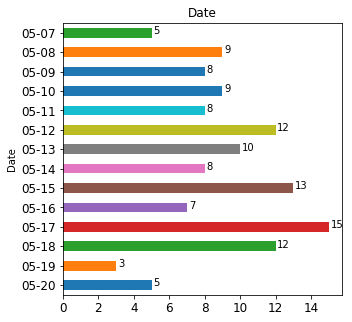

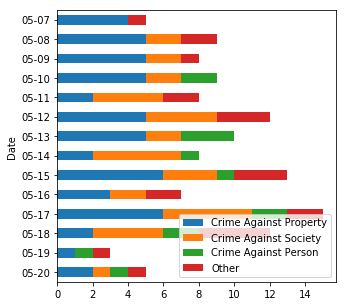

In [20]:
date4 = dayandcount(zip20904,.1)

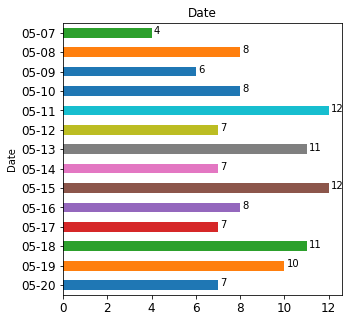

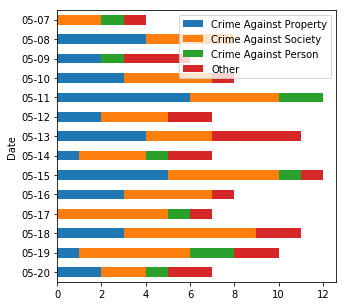

In [21]:
date5 = dayandcount(zip20906,.1)